# Большое практическое задание 1
# Классификация изображений цифр метрическими методами

## курс "Машинное обучение 1", программа AIMasters, 2022

## Студент: Александров Богдан

## Введение

Данное задание направлено на ознакомление с метрическими алгоритмами классификации, а также методами работы с изображениями. В задании вам будет необходимо:

1. Написать на языке Python собственные реализации метода ближайших соседей и кросс-валидации. Реализации должны соответствовать спецификации, описанной в прилагающихся модулях.     
    Частично проверить правильность выполнения своих реализаций можно с помощью системы ejudge в соответствующем соревновании.
    **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения.


2. Провести описанные ниже эксперименты с датасетом изображений цифр MNIST, описать полученые результаты и ответить на предложенные вопросы.


3. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно.

    **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать:
    `File -> Download as -> HTML (.html).`
    Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de).
Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями.

    Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.

### Некоторые полезные советы

1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль `knn`, можно добавить ячейку с таким содержимым:
     
```
    %load_ext autoreload
    
    %autoreload 2
```
   
2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `knn` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:

```
    tree
    ---knn
    ------__init__.py
    ------classification.py
    ------distances.py
    ------model_selection.py
    ------nearest_neighbors.py
    ---tests
    ------__init__.py
    ------test_classification.py
    ------test_distances.py
    ------test_model_selection.py
    ------test_nearest_neigbours.py
    experiments.ipynb
```

## Реализация алгоритмов (10 баллов)

Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить
все выданные тесты. Задание, не проходящее все выданные тесты, приравнивается к невыполненному. При
написании **необходимо пользоваться** стандартными средствами языка Python и библиотекой numpy. Библиотеками scipy и scikit-learn пользоваться **запрещено**, если это не обговорено отдельно в пункте задания. Для
экспериментов в бонусной части разрешается пользоваться любыми открытыми библиотеками, реализующими
алгоритмы обработки изображений.

Среди предоставленных файлов должны быть следующие модули и функции в них

1. Модуль `knn.distances` с реализацией функции для вычисления расстояния:
    1. `euclidean_distance(X, Y)` — реализация евклидова расстояния с заданными свойствами;
    2. `cosine_distance(X, Y)` — реализация косинусного расстояния с заданными свойствами;


2. Модуль `knn.nearest_neighbors`, содержащий собственную реализацию поиска ближайших соседей.
    
    Класс `NearestNeighborsFinder` с методами:
      1. `__init__(self, n_neighbors, metric="euclidean")` — конструктор (инициализатор) класса;
      2. `fit(self, X, y=None)` — обучение алгоритма;
      3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей.


3. Модуль `knn.classification`, содержащий собственную реализацию классификатора на основе метода ближайших соседей.

    Класс `KNNClassifier` с методами:
    
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’)` — конструктор (инициализатор) класса;
    2. `fit(self, X, y=None)` — обучение алгоритма;
    3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей;
    4. `predict(self, X)` — редсказание на новых данных;
    5. `_predict_precomputed(self, indices, distances)` — вспомогательный метод.
    
   Класс `BatchedKNNClassifier`, полезный для работы с большими выборками, с методами:
   
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’, batch_size=None)` — конструктор (инициализатор) класса
    2. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей, разбитый на несколько итераций по батчам
    3. `set_batch_size(self, batch_size)` — метод для выставления нового значения размера батча


4. Модуль `knn.model_selection` с реализациями функций для применения кросс-валидации:

    1. `knn_cross_val_score(X, y, k_list, scoring, cv=None, **kwargs)` — функция для измерения качества на кросс-валидации.

Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые unit-тесты, которые находятся рядом с модулем `knn` в директории `tests` Чтобы запустить тесты в консоли требуется выполнить одну из команд:


```
$ python -m unittest                            # запуск всех тестов
$ python -m unittest tests/test_distances.py    # запуск конкретных тестов
```

## Эксперименты (15 баллов)

Здесь вы можете заимпортировать всё, что вам потребуется для экспериментов:

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from knn.distances import euclidean_distance, cosine_distance 
from knn.classification import BatchedKNNClassifier
from knn.model_selection import knn_cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold

from sklearn import datasets
from scipy.io import arff

import time

### 1. Загрузка даннных

Эксперименты этого задания необходимо проводить на датасете MNIST. Загрузить датасет можно при помощи функции `sklearn.datasets.fetch_openml("mnist_784")` или скачать вручную с сайта
http://yann.lecun.com/exdb/mnist/. Датасет необходимо разбить на обучающую выборку (первые 60 тыс.
объектов) и тестовую выборку (10 тыс. последних объектов).

In [3]:
data = arff.loadarff('mnist.arff')
df = pd.DataFrame(data[0])
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'5'
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'4'
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'9'


In [4]:
X, y = np.array(df.iloc[:, :784]), np.array(df['class']).astype('int')

In [5]:
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

### 2. Исследование скорости методов поиска (4 балла)

Исследуйте, какой алгоритм поиска ближайших соседей будет быстрее работать в различных ситуациях.

Измерьте для каждого алгоритма поиска (`kd_tree`, `ball_tree`, `brute` и `my_own`) время нахождения 5 ближайших соседей для каждого объекта тестовой выборки по евклидовой метрике. Выберите подмножество признаков, по которому будет считаться расстояние, размера 10, 20, 100 (подмножество признаков выбирается один раз для всех объектов, случайно).

**Замечание.** Для оценки времени долго работающих функций можно пользоваться либо функциями из
модуля time, либо magic-командой %time, которая запускает код лишь один раз.

In [6]:
num_10 = 10
num_20 = 20
num_100 = 100
num_of_neighbors = 5

In [7]:
rng = np.random.default_rng()
ind_10 = rng.choice(X_train.shape[1], num_10, replace=False) #выбираем случайные 10 признаков
ind_20 = rng.choice(X_train.shape[1], num_20, replace=False) #выбираем случайные 20 признаков
ind_100 = rng.choice(X_train.shape[1], num_100, replace=False) #выбираем случайные 100 признаков

#здесь мы берем из изначальной выборки те фичи, которые выбрали выше
X_train_10, X_test_10 = np.take(X_train, ind_10, axis=1), np.take(X_test, ind_10, axis=1)
X_train_20, X_test_20 = np.take(X_train, ind_20, axis=1), np.take(X_test, ind_20, axis=1)
X_train_100, X_test_100 = np.take(X_train, ind_100, axis=1), np.take(X_test, ind_100, axis=1)

Далее будем использовать BatchedKNNClassifier с размером батча 200. При значениях выше у меня падал ноутбук.

In [8]:
clf = BatchedKNNClassifier(num_of_neighbors, algorithm='my_own', batch_size=200)

In [9]:
clf.fit(X_train_10, y_train)
%time clf.kneighbors(X_test_10)

clf.fit(X_train_20, y_train)
%time clf.kneighbors(X_test_20)

clf.fit(X_train_100, y_train)
%time clf.kneighbors(X_test_100)
print()

CPU times: user 9.69 s, sys: 13.1 ms, total: 9.7 s
Wall time: 9.93 s
CPU times: user 10.6 s, sys: 19.6 ms, total: 10.6 s
Wall time: 11.1 s
CPU times: user 12.7 s, sys: 8.84 ms, total: 12.7 s
Wall time: 16.9 s



In [10]:
clf = BatchedKNNClassifier(num_of_neighbors, algorithm='kd_tree', batch_size=200)

In [11]:
clf.fit(X_train_10, y_train)
%time clf.kneighbors(X_test_10)

clf.fit(X_train_20, y_train)
%time clf.kneighbors(X_test_20)

clf.fit(X_train_100, y_train)
%time clf.kneighbors(X_test_100)
print()

CPU times: user 2.89 s, sys: 382 µs, total: 2.89 s
Wall time: 3.27 s
CPU times: user 4.32 s, sys: 1.01 ms, total: 4.32 s
Wall time: 4.69 s
CPU times: user 2min 14s, sys: 172 ms, total: 2min 14s
Wall time: 2min 49s



In [12]:
clf = BatchedKNNClassifier(num_of_neighbors, algorithm='ball_tree', batch_size=200)

In [13]:
clf.fit(X_train_10, y_train)
%time clf.kneighbors(X_test_10)

clf.fit(X_train_20, y_train)
%time clf.kneighbors(X_test_20)

clf.fit(X_train_100, y_train)
%time clf.kneighbors(X_test_100)
print()

CPU times: user 4.8 s, sys: 0 ns, total: 4.8 s
Wall time: 5.22 s
CPU times: user 10 s, sys: 3.44 ms, total: 10 s
Wall time: 10.6 s
CPU times: user 1min 40s, sys: 16.9 ms, total: 1min 40s
Wall time: 1min 43s



In [14]:
clf = BatchedKNNClassifier(num_of_neighbors, algorithm='brute', batch_size=200)

In [15]:
clf.fit(X_train_10, y_train)
%time clf.kneighbors(X_test_10)

clf.fit(X_train_20, y_train)
%time clf.kneighbors(X_test_20)

clf.fit(X_train_100, y_train)
%time clf.kneighbors(X_test_100)
print()

CPU times: user 7.64 s, sys: 4.27 ms, total: 7.65 s
Wall time: 8.18 s
CPU times: user 7.89 s, sys: 246 µs, total: 7.89 s
Wall time: 8.31 s
CPU times: user 9.76 s, sys: 29 µs, total: 9.76 s
Wall time: 10.2 s



#### Приведите график / таблицу с результатами вашего эксперимента

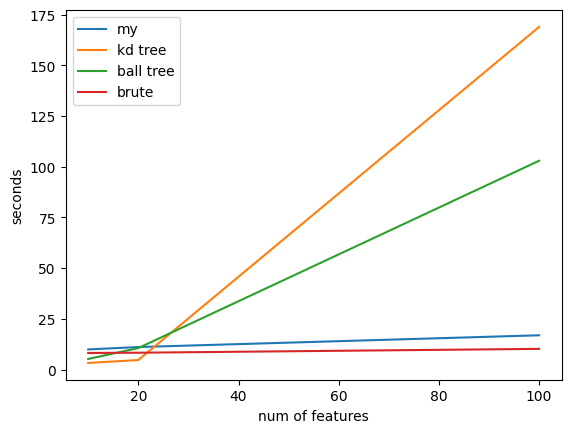

In [16]:
my = [9.93, 11.1, 16.9]
kd_tree = [3.27, 4.69, 169]
ball_tree = [5.22, 10.6, 103]
brute = [8.18, 8.31, 10.2]

x = [10, 20, 100]

plt.plot(x, my, label = "my")
plt.plot(x, kd_tree, label = "kd tree")
plt.plot(x, ball_tree, label = "ball tree")
plt.plot(x, brute, label = "brute")
plt.xlabel('num of features')
plt.ylabel('seconds')
plt.legend()
plt.show()

#### Ответьте на следующие вопросы

1. Какой алгоритм сработал быстрее всего для каждого из размера подвыборок? Ожидали ли вы такие результаты до проведения эксперимента?

    Для выборок размером 10 наилучшим алгоритмом оказался kd_tree.\
    Для выборки признаков размером 20 и 100 лучшим алгоритмом оказался brute.
    
    До проведения экспериментов, думал что brute будет хуже остальных.

2. Приведите теоретическую сложность каждого из алгоритмов поиска. Согласуется ли время работы алгоритмов на практике с их теоретической вычислительной сложностью? Как вы думаете, почему?

  Алгоритмы kd-tree и ball_tree строят бинарное дерево, что занимает в обычном случае O(nlog(n)) времени, где n - размер выборки. Но у нас каждая точка - размерности d, поэтому время построения займет O(dnlog(n)). Чтобы найти одного ближайшего соседа, нам нужно log(n) времени, так как надо сделать обход по дереву. Для поиска k соседей, нужно k\*O(log(n))=O(klog(n)) времени. Если размер тестовой выборки M, то итоговая сложность получится O(Mklog(n)).\
  
   Метод brute-force же учится за O(1), просто запоминает выборку. Для предсказания он находит расстояния за O(n\*d) времени, так как n точек размерности d.Затем делает проход по n объектам, выбирая k ближайших соседей, что занимает O(n\*k) времени. Суммарная сложность по времени будет O(Mn(k+d)). Наш алгоритм по сути, тоже брутфорс, сложность такая же.\
   
   С теоретической сложностью не совсем согласуется, так как я привел выше оценки в худших случаях, в среднем алгоритмы будут работать чуть получше. Поэтому kd-tree и ball_tree для маленьких размерностей работают быстрее, но чем больше размерностей, тем дольше работа алгоритма. Мы меняли размерность в экспериментах, то есть d. В случае первых двух алгоритмов, сложность растет пропорционально O(nlog(n)) при увеличении d, а у брутфорса и нашего - лишь пропорционально O(n).

3. Какой алгоритм исходя из результатов эксперимента следует использовать в дальнейшем? Выберите алгоритм поиска соседей, который вы будете использовать во всех экспериментах ниже. 

    Далее буду использовать алгоритм brute, так как на маленькой выборке признаков время работы не сильно хуже, а на большом количестве признаков - сильно лучше.

### 3. Исследование зависимости точности алгоритма на кросс-валидации (4 балла)


Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) алгоритма k ближайших соседей в зависимости от следующих факторов:
* количество соседей k от 1 до 10
* используется евклидова или косинусная метрика

In [24]:
cv = KFold(n_splits=3, shuffle=True, random_state=226)
k_list = np.arange(1,11)

In [25]:
res = knn_cross_val_score(X_train, y_train, k_list, "accuracy", cv, algorithm='brute', metric='euclidean', batch_size=200)

In [26]:
cos_res = knn_cross_val_score(X_train, y_train, k_list, "accuracy", cv, algorithm='brute', metric='cosine', batch_size=200)

In [38]:
euc = [np.mean(x) for x in res.values()]
cos = [np.mean(x) for x in cos_res.values()]

In [40]:
print(euc)
print(cos)

[0.9700166666666666, 0.9622666666666667, 0.96995, 0.9681166666666666, 0.9687166666666666, 0.9674333333333335, 0.9669333333333333, 0.9658000000000001, 0.9651333333333333, 0.9645]
[0.9743333333333334, 0.9696000000000001, 0.9739999999999999, 0.9733499999999999, 0.9726500000000001, 0.9721500000000001, 0.9714166666666667, 0.9712166666666667, 0.9702833333333333, 0.9698166666666667]


#### Нарисуйте график зависимости точности от количества соседей по каждой метрике

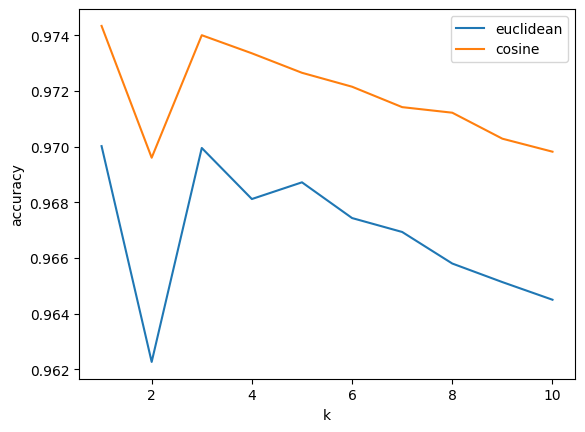

In [41]:
x = [i for i in range(1,11)]

plt.plot(x, euc, label = "euclidean")
plt.plot(x, cos, label = "cosine")
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор (например, если у вас несколько наборов параметров с высоким качеством, обоснуйте как вы выберите среди этих наборов один).

   *По результатам эксперимента, наилучшее качество показала модель с k=3 соседями и косинусной метрикой*


2. Какая метрика лучше себя показала в экспериментах? Можете ли вы объяснить, почему?

    *Лучшее качество показала косинусная метрика. Предположу, что похожие цифры имеют похожие вектора, если вытянуть картинки попиксельно. Косинусная метрика показывает схожесть векторов, евклидова же показывает близость точек. Поэтому косинусная метрика дала лучшее качество, так как вектора похожих цифр похожи*
    
   
2. Есть ли на графике зависимости точности от количество соседей "выбросы", резкие падения/повышения качества для одного значения k по сравнению с соседними? Если да, предположите причину появления этих выбросов.

    *Есть резкое повышение качество при переходе от 2 ближайших соседей к 3, и резкое понижение при переходе от 1 к 2. Наверно, 3 - оптимальное значение гиперпараметра k. При k=2 мы рассматриваем лишь два объекта с трейновой выборки, которые могут быть разных классов. Из-за особенности реализации, мы выдаем класс "поменьше", то есть меньшее число. Поэтому на k=2 у нас не часто получалось верно предсказать класс. Для k=1 мы находили самый близкий объект по метрике. Так как одинаковые цифры имеют схожий паттерн, это помогло модели находить наипохожий объект в обучающей выборке, что дает хорошее качество.*

### 3. Исследование зависимости точности взвешенного алгоритма на кросс-валидации (4 балла)

По результатам предыдущего эксперимента выберите метрику, которую вы будете использовать в этом эксперименте.

Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) взвешенного алгоритма k ближайших соседей в зависимости от количество соседей k (от 1 до 10).

Голос объекта положите равным `1 / (distance + eps)`, где `eps` = `1e-5`.

In [42]:
dist_res = knn_cross_val_score(X_train, y_train, k_list, "accuracy", cv, algorithm='brute', metric='cosine', weights='distance', batch_size=200)

In [44]:
dist = [np.mean(x) for x in dist_res.values()]
print(dist)

[0.9743333333333334, 0.9743333333333334, 0.97505, 0.9758166666666667, 0.9738000000000001, 0.9745333333333334, 0.9726500000000001, 0.9733499999999999, 0.9715833333333334, 0.97155]


#### Нарисуйте график зависимости точности от количества соседей 

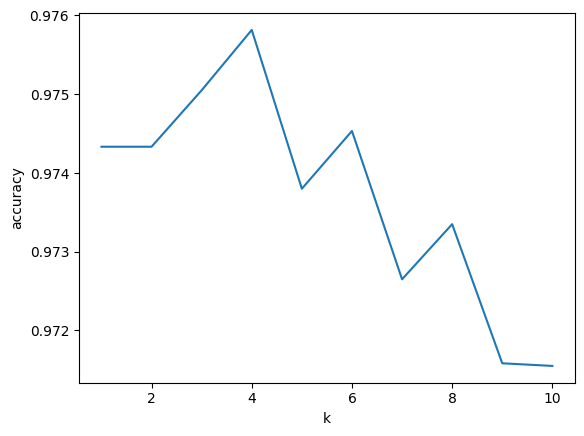

In [46]:
x = [i for i in range(1,11)]

plt.plot(x, dist)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор.

   *Судя по экспериментам, наилучшим набором гиперпараметров является (k=4, metric=cosine, weigths=distance), так как он дал наилучшее качество на валидации.*


2. Сравните результаты взвешенного алгоритма с невзвешенным. Объясните разницу/отсутствие разницы в результатах.

   *Судя по графикам, качество повысилось на 0.15-0.2 процента по сравнению с равными весами, что практически ничего. Скорее всего, объекты расположены близко друг к другу в векторном пространстве, поэтому веса не сыграли большой роли. Сущетвенно улучшить качество не удалось.*

### 4. Применение алгоритма и интерпретация ошибок (3 балла)

1. Примените лучший алгоритм к исходной обучающей и тестовой выборке и посчитайте точность классификации. Сравните с точностью по кросс-валидации. Опишите ваши результаты.

In [47]:
best_model = BatchedKNNClassifier(3, algorithm='brute', batch_size=200, metric='cosine', weights='distance')

In [48]:
pred = best_model.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, pred)

0.9742

   *Как видно по точности, по сравнению с кросс-валидацией, качество практически не просело, хуже максимум на 0.2 процента. Скорее всего, мы подобрали оптимальную модель.*

2. Постройте и проанализируйте матрицу ошибок (confusion matrix), используйте функцию `sklearn.metrics.confusion_matrix`. Визуализируйте несколько объектов из тестовой выборки, на которых были допущены ошибки. Проанализируйте и укажите их общие черты.

In [50]:
confusion_matrix(y_test, pred)

array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1130,    3,    1,    0,    0,    1,    0,    0,    0],
       [   8,    1, 1009,    1,    1,    0,    0,    8,    4,    0],
       [   0,    1,    3,  975,    0,   13,    0,    5,    7,    6],
       [   2,    2,    0,    0,  946,    0,    6,    1,    1,   24],
       [   4,    0,    0,    9,    1,  859,    7,    1,    6,    5],
       [   4,    2,    0,    0,    2,    3,  947,    0,    0,    0],
       [   1,   10,    6,    0,    1,    0,    0,  996,    0,   14],
       [   6,    2,    2,   10,    4,    4,    4,    3,  936,    3],
       [   8,    7,    2,    5,    7,    3,    1,    6,    3,  967]])

На диагонали расположены большие числа, вне диагонали маленькие, что говорит о том, что подавляющее большинство объектов мы предсказали верно.

Рассмотрим 6 объектов, которые мы классифицировали неправильно.

In [75]:
error_indeces = np.where((pred==y_test)==False)[0]

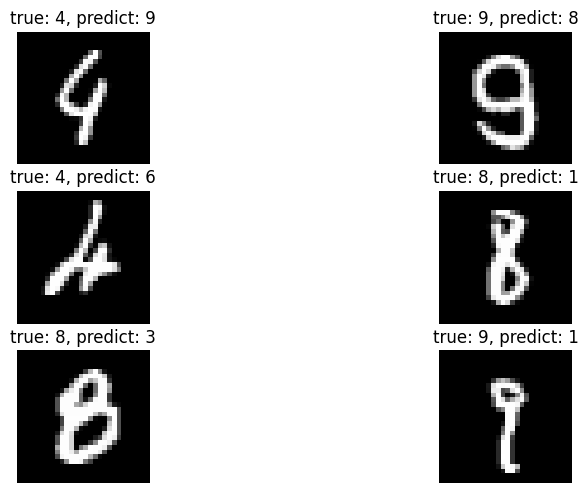

In [81]:
fig=plt.figure(figsize=(10, 10))
for i in range(0,6):
    fig.add_subplot(5,2,i+1)
    plt.title("true: " + str(y_test[error_indeces[i]]) + ", predict: " + str(pred[error_indeces[i]]))
    plt.axis('off')
    plt.imshow(mismatch[i].reshape(28, 28), cmap='gray')
plt.show()

*Цифры, которые были неверно классифицированы, действительно трудно распознать. Либо же они очень похожи на другие цифры, из-за чего модель предсказывала их неправильно.*

## Бонус 1. Размножение обучающей выборки (3 балла)

Размножьте обучающую выборку с помощью поворотов, смещений, применений гауссовского фильтра и морфологических операций. Разрешается использовать библиотеки для работы с изображениями. Подобрать по кросс-валидации с 3 фолдами параметры преобразований. Рассмотреть следующие параметры для преобразований и их комбинации:
1. Величина поворота: 5, 10, 15 (в каждую из двух сторон)
2. Величина смещения: 1, 2, 3 пикселя (по каждой из двух размерностей)
3. Дисперсия фильтра Гаусса: 0.5, 1, 1.5
4. Морфологические операции: эрозия, дилатация, открытие, закрытие с ядром 2

Проанализируйте, как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

**Замечание.** Не обязательно хранить все обучающие выборки в процессе эксперимента. Достаточно вычислить ближайших соседей по каждой из выборок, а затем выбрать из них ближайших соседей.

**Замечание по дизайну эксперимента**. В этой части вам предлагается самим выбрать дизайн эксперимента. Перебор всевоможных комбинаций преобразований может быть затруднительным, в то время как жадный выбор преобразований уже даст улучшение в качестве.

In [82]:
from PIL import Image
from knn.nearest_neighbors import get_best_ranks

In [83]:
def rotate_func(X):
    angle = np.random.randint(4) * 5
    tmp = Image.fromarray(X.reshape(28,-1))
    return np.array(tmp.rotate(angle)).reshape(28*28,)

In [84]:
def move_up(X):
    tmp = X.reshape(28,28)
    for i in range(tmp.shape[0]):
        if i > 25:
            tmp[i] = np.full(tmp.shape[0], -0.42421296)
        else:
            tmp[i] = tmp[i + 2]
    return tmp.reshape(28*28,)

def move_right(X):
    tmp = X.reshape(28,28)
    for vec in tmp:
        vec[2:] = vec[:-2]
        vec[0] = vec[1] = -0.42421296
    return tmp.reshape(28*28,)

def move_left(X):
    tmp = X.reshape(28,28)
    for vec in tmp:
        vec[:-2] = vec[2:]
        vec[-2] = vec[-1] = -0.42421296
    return tmp.reshape(28*28,)

def move_down(X):
    tmp = X.reshape(28,28)
    for i in range(tmp.shape[0]):
        if i > 25:
            tmp[27 - i] = np.full(tmp.shape[0], -0.42421296)
        else:
            tmp[27 - i] = tmp[27 - i - 2]
    return tmp.reshape(28*28,)

def random_move(X):
    x_ax = np.random.randint(3)
    y_ax = np.random.randint(3)
    if (x_ax == 1):
        move_right(X)
    elif (x_ax == 2):
        move_left(X)
    
    if (y_ax == 1):
        move_up(X)
    elif (y_ax == 2):
        move_down(X)
    return X

In [85]:
def noise_func(X):
    tmp = X.reshape(28, 28) + np.array(Image.effect_noise((28,28), 0.5)).astype(int) -128
    return tmp.reshape(28*28,)


In [89]:
best_model = BatchedKNNClassifier(3, algorithm='brute', batch_size=200, metric='cosine', weights='distance')
dist1, ind_1 = best_model.fit(np.apply_along_axis(rotate_func, 1, X_train), y_train).kneighbors(X_test, return_distance=True)
dist2, ind_2 = best_model.fit(X_train, y_train).kneighbors(X_test, return_distance=True)

In [101]:
y_train[ind.astype(int)]

array([[7, 7, 7],
       [2, 2, 2],
       [1, 1, 1],
       ...,
       [4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])

## Бонус 2. Размножение тестовой выборки (2 балла)

Реализуйте предложенный на семинаре алгоритм, основанный на преобразовании объектов тестовой выборки.
Проверьте то же самое множество параметров, что и в предыдущем пункте.

Проанализируйте как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

In [ ]:
## your code here ##

## Бонус 3. Сравнение подходов (1 балл)

Если вы реализовали оба подхода, сравните их между собой.

1. Какой подход даёт больший выигрыш в качестве и почему?

    *ваш ответ*
    

2. Есть ли какие-то преимущества у худшего по качеству подхода по сравнению с лучшим?

    *ваш ответ*